In [1]:
import pandas as pd
import numpy as np

In [68]:
# Dataset #1
df_expenditure = pd.read_csv('C:/Users/GAME/Downloads/DFXARC1M027SBEA1.csv')
df_expenditure['DATE'] = pd.to_datetime(df_expenditure['DATE'])
df_expenditure

,DATE,DFXARC1M027SBEA
0,2019-01-01,1023.2
1,2019-02-01,1003.5
2,2019-03-01,1019.3
3,2019-04-01,1025.0
4,2019-05-01,1029.9
5,2019-06-01,1035.4
6,2019-07-01,1044.7
7,2019-08-01,1046.5
8,2019-09-01,1037.1
9,2019-10-01,1039.7


In [55]:
def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

In [76]:
# Dataset #2

from urllib.request import urlopen

link = "http://www.calendar-12.com/catholic_holidays/2019"
response = urlopen(link)
content = response.read().decode("utf-8")


In [57]:
table = find_between(content, "<tbody>","</tbody>");
rows = table.split("/tr")

csv = "Day\n"
for row in rows:
    day = find_between(row, '">', "</t")
    day = find_between(day, "> ", "</")
    csv = csv + day + "\n"

print(csv)

Day
Tuesday, January 1, 2019
Sunday, January 6, 2019
Tuesday, March 5, 2019
Wednesday, March 6, 2019
Sunday, April 14, 2019
Thursday, April 18, 2019
Friday, April 19, 2019
Sunday, April 21, 2019
Monday, April 22, 2019
Thursday, May 30, 2019
Sunday, June 9, 2019
Thursday, June 20, 2019
Thursday, August 15, 2019
Friday, November 1, 2019
Monday, December 9, 2019
Wednesday, December 25, 2019




In [58]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

    
df_catholic = pd.read_csv(StringIO(csv), sep=";")
df_catholic.head()


,Day
0,"Tuesday, January 1, 2019"
1,"Sunday, January 6, 2019"
2,"Tuesday, March 5, 2019"
3,"Wednesday, March 6, 2019"
4,"Sunday, April 14, 2019"


In [101]:
from datetime import datetime
# Strip out weekday name
df_catholic["DATE"] =  df_catholic.apply(lambda row:row["Day"][row["Day"].find(",")+1:], axis=1)
# Convert to date
df_catholic["DATE"] =  df_catholic.apply(lambda row: datetime.strptime(row["DATE"], " %B %d, %Y"), axis=1)
df_catholic["Holiday"] = 1
df_catholic
# df_catholic.dtypes

,Day,DATE,Holiday
0,"Tuesday, January 1, 2019",2019-01-01,1
1,"Sunday, January 6, 2019",2019-01-06,1
2,"Tuesday, March 5, 2019",2019-03-05,1
3,"Wednesday, March 6, 2019",2019-03-06,1
4,"Sunday, April 14, 2019",2019-04-14,1
5,"Thursday, April 18, 2019",2019-04-18,1
6,"Friday, April 19, 2019",2019-04-19,1
7,"Sunday, April 21, 2019",2019-04-21,1
8,"Monday, April 22, 2019",2019-04-22,1
9,"Thursday, May 30, 2019",2019-05-30,1


In [60]:
df_expenditure['DFXARC1M027SBEA'] = df_expenditure['DFXARC1M027SBEA'].astype('int64')
df_expenditure.dtypes

DATE               object
DFXARC1M027SBEA     int64
dtype: object

# VISUALISATION

In [62]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [63]:
%matplotlib notebook

<IPython.core.display.Javascript object>


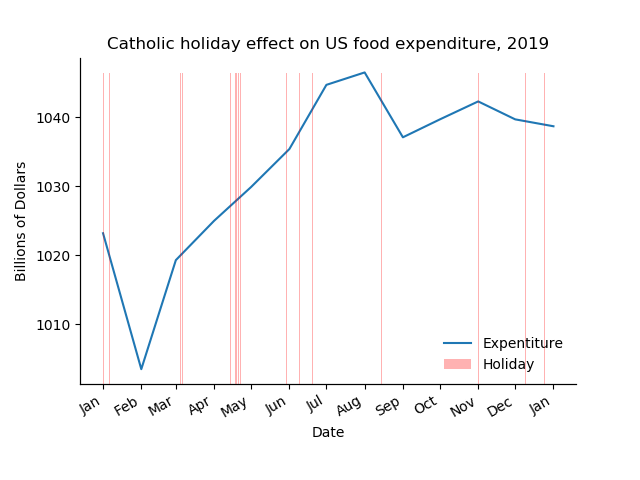

In [95]:
fig, ax = plt.subplots()
a = ax.plot(df_expenditure["DATE"], df_expenditure["DFXARC1M027SBEA"], label="Expentiture", zorder=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Date")
plt.ylabel("Billions of Dollars")
plt.title("Catholic holiday effect on US food expenditure, 2019")

ax2 = ax.twinx()


b = ax2.bar(df_catholic["DATE"],df_catholic["Holiday"], alpha=0.3, label="Holiday", color="Red")

ax2 = plt.gca()
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)



ax2 = plt.gca()
ax2.yaxis.set_visible(False)

# Combine legend
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=4, frameon = False)

months = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct' ,'Nov', 'Dec', 'Jan']
plt.xticks(list(df_expenditure["DATE"]), months, rotation='vertical')
fig.autofmt_xdate()


plt.show()